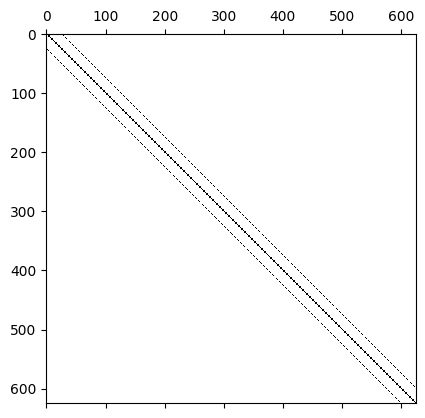

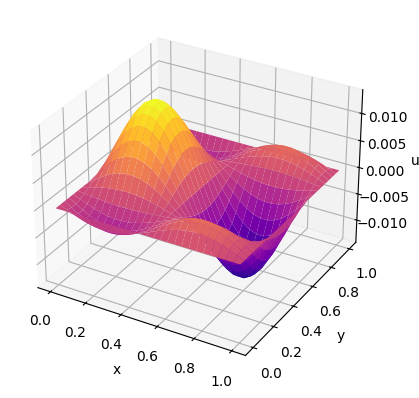

In [2]:
#!/usr/bin/python3
import numpy as np
from math import *
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Grid setup
m=25
mm=m*m
h=1.0/(m+1)

# Create derivative matrix and source term
d=np.zeros((mm,mm))
f=np.empty((mm))
hfac=1/(h*h)
for i in range(m):
    y=(i+1)*h
    for j in range(m):
        ij=m*j+i

        # Construct 5-point Laplacian stencil 
        d[ij,ij]=-4*hfac
        if i>0: d[ij,ij-1]=hfac
        if i<m-1: d[ij,ij+1]=hfac
        if j>0: d[ij,ij-m]=hfac
        if j<m-1: d[ij,ij+m]=hfac

        # Source term
        x=(j+1)*h
        f[ij]=np.cos(2*np.pi*x)*np.sin(2*np.pi*y)

# Display the sparsity structure of the derivative matrix
plt.spy(d)
plt.show()

# Solve the linear system
u=np.linalg.solve(d,f)

# Reconstruct full grid
uu=np.zeros((m+2,m+2))
for i in range(m):
    uu[i+1,1:m+1]=u[i*m:(i+1)*m]

# Plot using Matplotlib
xa=np.linspace(0,1,m+2)
mgx,mgy=np.meshgrid(xa,xa);
fig,ax=plt.subplots(subplot_kw={"projection": "3d"})
surf=ax.plot_surface(mgx,mgy,uu,cmap=cm.plasma,rstride=1,cstride=1,linewidth=0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.show()